Enter your desired number:
1) Show Graph 
2) View Insights 
3) Exit
1
Enter Origin in this format "AUCKLAND (AKL)"
SYDNEY (SYD)
Enter Destination in this format "AUCKLAND (AKL)"
AUCKLAND (AKL)
Enter Departure date in this format "2018-12-31"
2018-12


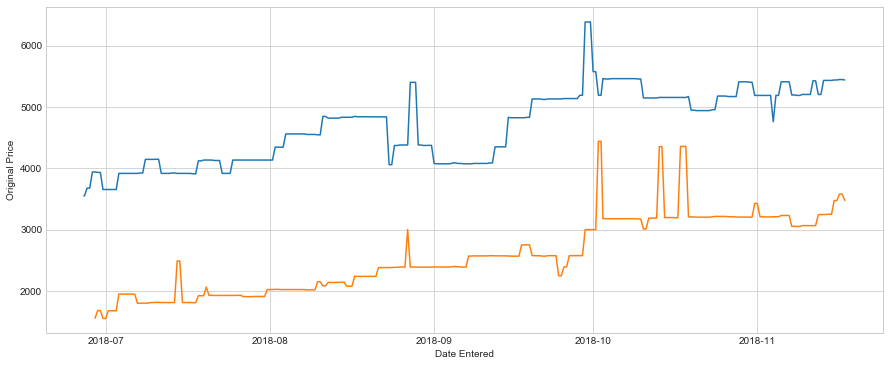

Enter your desired number:
1) Show Graph 
2) View Insights 
3) Exit
2
Origin : SYDNEY (SYD)
Destination : AUCKLAND (AKL)
Departing : 2018-12
Returning : 
Depart Airline : 


C:\Users\HP 840\Anaconda3\lib\site-packages\ipykernel_launcher.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


The best time to buy ticket is before 119 days 00:00:00 of departure
Enter your desired number:
1) Show Graph 
2) View Insights 
3) Exit
3


In [2]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

dfTrip = pd.read_excel('C:\\Users\\HP 840\\Desktop\\Analysis & Insights\\Analysis & Insights - Flight prices.xlsx', sheet_name='Trip data (live)')
dfTrip = dfTrip.dropna(how='all')
#print('Sheet Imported')

df = pd.read_excel('C:\\Users\\HP 840\\Desktop\\Analysis & Insights\\Analysis & Insights - Flight prices.xlsx', sheet_name='Daily flight prices (live)')
df = df.dropna(how='all')
df = df.rename(columns=df.iloc[0])
df = df.drop(df.index[0])
#print('Sheet Imported')

def userInput():
    user = input('Enter your desired number:\n1) Show Graph \n2) View Insights \n3) Exit\n')
    return user


def showGraph(dfTrip,df):
    origin = str(input('Enter Origin in this format "AUCKLAND (AKL)"\n'))
    destination = str(input('Enter Destination in this format "AUCKLAND (AKL)"\n'))
    departure_date = str(input('Enter Departure date in this format "2018-12-31"\n'))
    dfTrip['DateStr'] = dfTrip['Departing'].dt.strftime('%Y-%m-%d')    #converting time to string so it can be compared as strings
    df_plot = dfTrip.loc[(dfTrip['Origin'] == origin) & (dfTrip['Destination'] == destination) & (dfTrip['DateStr'].str.contains(departure_date))]
    del dfTrip['DateStr'] #we created this row to compare date and no use of it
    CIF_ID  = df_plot['CIF ID']
    cif_id = list(CIF_ID)
    x_axis = []
    y_axis = []
    for loop in cif_id:
        df.dropna(how='all', inplace = True)
        df_Graph = df[pd.to_numeric(df[loop], errors='coerce').notnull()]
        df_Graph = df_Graph[loop]
        x_axis.append(df_Graph.index)
        y_axis.append(df_Graph.values)
        string = 'plt.plot('
    for index in range(len(x_axis)):
        string += 'x_axis[%s],y_axis[%s],'%(index,index)
    string = string[:-1]
    string = string+')'
    plt.figure(figsize=(15,6))
    exec(string)
    plt.ylabel('Original Price')
    plt.xlabel('Date Entered')
    plt.show()

    return


def TicketBuyInsights(df):
    dataEntered = {}
    for loop in df.columns:
        if loop == 'Destination' or loop == 'Origin' or loop == 'Departing' or loop =='Depart Airline' or loop == 'Returning':
            user = str(input("%s : "%loop))
            if user:
                dataEntered[loop] = user
        else:
            continue
            
    returnTime = []
    for loop in df['Returning']:
        try:
            returnTime.append(loop.strftime("%Y-%m-%d"))
        except:
            returnTime.append(None)
    df['RetDate'] = returnTime
    df['DepDate'] = df['Departing'].dt.strftime('%Y-%m-%d')
    
    df_insights_string = 'df.loc['
    
    for loop in dataEntered:
        if loop == 'Departing':
            df_insights_string += '(df["DepDate"].str.contains("%s")) & '%dataEntered[loop]
        elif loop == 'Returning':
            df_insights_string += '(df["RetDate"].str.contains("%s")) & '%dataEntered[loop]
        else:
            df_insights_string += '(df["%s"] == "%s") & '%(loop,dataEntered[loop])
    df_insights_string = df_insights_string[:-2]
    df_insights_string += ']'
   
    try:
        df_insights = eval(df_insights_string)
        
    except:
        print("Wrong data input")
        return
    
    del df['DepDate']
    del df['RetDate']
    new_price = []
    for index in zip(df_insights['Travellers'],df_insights['Original Price']):
        try:
            person = int(index[0]) 
            new_price.append(round(index[1]/person,2))
        except:
            new_price.append(None)
            continue
    df_insights['Per Person Price'] = new_price
    try:
        min_row = df_insights.loc[df_insights['Per Person Price'].idxmin()]
        bttbt = min_row['Departing'] - min_row['Purchase date']
        print("The best time to buy ticket is before %s of departure"%bttbt)
    except Exception as e:
        print("No rows found: ",e)
        return

stop = False    
while stop == False:
    try:
        user = userInput()
        user = int(user)
    except:
        print("Try Again")
        pass

    if user == 1:
        try:
            showGraph(dfTrip,df)
        except:
            print("No data Found...Check your format again")
            continue

    elif user == 2:
        try:
            TicketBuyInsights(dfTrip)
        except:
            print("No insights found")
            continue
        
    else:
        stop = True
